# Do V subtraction

### Mar 19, 2021

## Code

In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
# import deDisperse_util as util
# from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")
# import pyrex.custom.ara as ara


In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

# Soft triggers distribution

In [119]:
wf = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_Reconstruction/DPulseWforms_run012559.pkl")
softWf = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_Reconstruction/SoftTrigWforms_run012559.pkl")

In [120]:
softWf.tail()

,ch0Wf,ch1Wf,ch2Wf,ch3Wf,ch4Wf,ch5Wf,ch6Wf,ch7Wf,ch8Wf,ch9Wf,ch10Wf,ch11Wf,ch12Wf,ch13Wf,ch14Wf,ch15Wf,time,unixTime
2060,"[15.583926824946797, 13.2914355119595, -20.439...","[5.423325651962658, 21.569023754104904, 14.135...","[-7.223587943653972, 7.015752419171369, 35.159...","[-8.383447585505696, 8.30027152370564, 41.3335...","[-6.8353306945415415, -17.29335377699584, 1.20...","[5.850567609769895, 15.248097130813187, 5.0261...","[-6.732218298632219, -9.35997526876853, 30.120...","[13.130489200536704, 18.636229959704313, -17.1...","[-5.34461702299693, -19.44429159992383, -16.64...","[7.379273194136159, 23.362667775271174, 43.988...","[-7.6970162189376525, -19.768364748622247, -9....","[6.205422289547469, 8.505158542619402, 2.08550...","[-17.52537457583503, -8.496838226368887, 48.17...","[-20.038800776243626, -34.9954490858766, -9.39...","[-8.18575351662684, 1.7410142627452734, 27.139...","[7.2654183489350945, 3.930482768562017, -9.902...","[-43.10492218330414, -42.60492218330414, -42.1...",1545619975
2061,"[10.46150568710039, 10.486884584390513, -13.75...","[-12.001063611541595, 6.214583933957097, 37.40...","[-16.730203951082714, -12.762256022762049, 38....","[-15.050183475199862, -7.25969583091342, 36.67...","[6.417346445513867, -2.336712043850031, -24.83...","[5.696903765120258, 3.002248030122633, -13.218...","[-9.448223697894665, -5.056677070542738, 22.87...","[8.280510934110895, 5.395080975168448, -17.426...","[6.8705162507719235, -5.30551870207893, -4.429...","[12.152839078304568, 6.995352465498122, -16.55...","[14.969367917471246, 14.115958319370932, -22.6...","[-5.564089748362714, -20.05642392734622, -12.0...","[-11.767405104077094, -42.76996071117355, -37....","[14.33455917681822, 20.875799285391714, 9.7789...","[-7.385720414859797, 1.0400742153452498, 6.634...","[22.33442510811553, 48.55881624964121, 14.2642...","[-42.53097686320295, -42.03097686320295, -41.5...",1545619976
2062,"[-12.336989516630915, -16.48822180973681, 12.5...","[-14.143513168028592, -0.7118297632290767, 35....","[5.325586155801957, 16.8833098706973, 11.87971...","[-12.045871512274921, -0.040422793214138775, 2...","[-12.615633581034336, -18.961663435173605, -0....","[-11.581744825139127, -7.8776068520864495, 23....","[-11.86061622098298, 9.041009154310343, 48.232...","[-13.882015564978143, -17.849588442972664, 12....","[-19.834339488316115, -37.847561371284485, -10...","[-6.0575034805857655, -13.138142874212717, 2.4...","[15.781975202187892, 40.4174135015798, 37.5347...","[7.110629382382848, 6.080447551612642, -3.9633...","[-7.029291924461582, -24.335713537957204, -23....","[29.199796708642296, 49.03034002996707, 1.1249...","[27.18646911250692, 48.71784881447901, 13.8642...","[-10.124314023196773, -24.075691172561942, -15...","[-43.03097686320295, -42.53097686320295, -42.0...",1545619977
2063,"[15.856993119150994, 34.87602491765836, 17.577...","[6.619081341669456, 13.722716922236133, 10.189...","[19.759888767212324, 13.557078784011235, -32.1...","[-5.604376727143433, -7.2240418647859785, -1.0...","[14.089829201250115, 21.64494855289473, -11.24...","[-5.1503667127016675, 3.2881196888947173, 17.7...","[-5.233898901107763, -22.77289664228298, -27.8...","[-12.330703723234006, -13.288900675286941, 25....","[5.6088845635927544, 10.391909919207311, 15.76...","[8.904826572039275, 1.7880817706828158, -11.19...","[21.41015677112247, 18.45498291075295, -13.850...","[12.706819181974849, 14.18177493316287, -7.046...","[10.14181215658489, 32.755687578272656, 12.517...","[-7.964141656253275, -21.17529998290375, -9.68...","[-6.181387956263446, -28.243226885660764, -32....","[9.750715884873346, 4.130152469216334, -12.064...","[-43.10492218330414, -42.60492218330414, -42.1...",1545619978
2064,"[6.003937284175209, 0.7945118330156808, -19.39...","[14.590307020536695, 15.973535783489764, -15.3...","[14.379280196531512, 3.8391280177509053, -28.9...","[9.825054760525205, 13.1272698419675, 8.980478...","[-9.297566478358188, -1.942007715375487, 29.23...","[8.04395606840795

### Add interpolated depth to df

In [121]:
depth_1224 = pd.read_csv("./plots/SpiceCorePolReco/A2_1224Depth.txt")
time = pd.to_datetime(depth_1224.NZ_Time)
# time = time.reindex(time)
# time = time.tz_localize('NZ').tz_convert("UTC")
time.head()
newTime = time.apply(lambda dt: dt.replace(day=24, month = 12, year = 2018))
# newTime#Still in NZ local time. Need to translate to UTC
df = pd.DataFrame(1, index=newTime, columns=['X'])
import pytz
nz = pytz.timezone('NZ')
utc = pytz.timezone('UTC')
df.index = df.index.tz_localize(nz).tz_convert(utc)
unixTimeDepth = (df.index - pd.Timestamp("1970-01-01").tz_localize(utc)) // pd.Timedelta('1s')#This is unix time 

In [123]:
f = scipy.interpolate.interp1d(unixTimeDepth, depth_1224.depth,bounds_error=False, fill_value=0.)
wf = wf.loc[(wf.unixTime>min(wf.unixTime)) & (wf.unixTime<2.15*1E4+1.5456*1E9)]
softWf = softWf.loc[(softWf.unixTime>min(wf.unixTime)) & (softWf.unixTime<2.15*1E4+1.5456*1E9)]

interp_depth = f(wf.unixTime)
interp_depthSoft = f(softWf.unixTime)

wf["interp_depth"] = interp_depth
softWf["interp_depth"] = interp_depthSoft

In [124]:
softWf.tail()

,ch0Wf,ch1Wf,ch2Wf,ch3Wf,ch4Wf,ch5Wf,ch6Wf,ch7Wf,ch8Wf,ch9Wf,ch10Wf,ch11Wf,ch12Wf,ch13Wf,ch14Wf,ch15Wf,time,unixTime,interp_depth
2060,"[15.583926824946797, 13.2914355119595, -20.439...","[5.423325651962658, 21.569023754104904, 14.135...","[-7.223587943653972, 7.015752419171369, 35.159...","[-8.383447585505696, 8.30027152370564, 41.3335...","[-6.8353306945415415, -17.29335377699584, 1.20...","[5.850567609769895, 15.248097130813187, 5.0261...","[-6.732218298632219, -9.35997526876853, 30.120...","[13.130489200536704, 18.636229959704313, -17.1...","[-5.34461702299693, -19.44429159992383, -16.64...","[7.379273194136159, 23.362667775271174, 43.988...","[-7.6970162189376525, -19.768364748622247, -9....","[6.205422289547469, 8.505158542619402, 2.08550...","[-17.52537457583503, -8.496838226368887, 48.17...","[-20.038800776243626, -34.9954490858766, -9.39...","[-8.18575351662684, 1.7410142627452734, 27.139...","[7.2654183489350945, 3.930482768562017, -9.902...","[-43.10492218330414, -42.60492218330414, -42.1...",1545619975,600.925926
2061,"[10.46150568710039, 10.486884584390513, -13.75...","[-12.001063611541595, 6.214583933957097, 37.40...","[-16.730203951082714, -12.762256022762049, 38....","[-15.050183475199862, -7.25969583091342, 36.67...","[6.417346445513867, -2.336712043850031, -24.83...","[5.696903765120258, 3.002248030122633, -13.218...","[-9.448223697894665, -5.056677070542738, 22.87...","[8.280510934110895, 5.395080975168448, -17.426...","[6.8705162507719235, -5.30551870207893, -4.429...","[12.152839078304568, 6.995352465498122, -16.55...","[14.969367917471246, 14.115958319370932, -22.6...","[-5.564089748362714, -20.05642392734622, -12.0...","[-11.767405104077094, -42.76996071117355, -37....","[14.33455917681822, 20.875799285391714, 9.7789...","[-7.385720414859797, 1.0400742153452498, 6.634...","[22.33442510811553, 48.55881624964121, 14.2642...","[-42.53097686320295, -42.03097686320295, -41.5...",1545619976,600.740741
2062,"[-12.336989516630915, -16.48822180973681, 12.5...","[-14.143513168028592, -0.7118297632290767, 35....","[5.325586155801957, 16.8833098706973, 11.87971...","[-12.045871512274921, -0.040422793214138775, 2...","[-12.615633581034336, -18.961663435173605, -0....","[-11.581744825139127, -7.8776068520864495, 23....","[-11.86061622098298, 9.041009154310343, 48.232...","[-13.882015564978143, -17.849588442972664, 12....","[-19.834339488316115, -37.847561371284485, -10...","[-6.0575034805857655, -13.138142874212717, 2.4...","[15.781975202187892, 40.4174135015798, 37.5347...","[7.110629382382848, 6.080447551612642, -3.9633...","[-7.029291924461582, -24.335713537957204, -23....","[29.199796708642296, 49.03034002996707, 1.1249...","[27.18646911250692, 48.71784881447901, 13.8642...","[-10.124314023196773, -24.075691172561942, -15...","[-43.03097686320295, -42.53097686320295, -42.0...",1545619977,600.555556
2063,"[15.856993119150994, 34.87602491765836, 17.577...","[6.619081341669456, 13.722716922236133, 10.189...","[19.759888767212324, 13.557078784011235, -32.1...","[-5.604376727143433, -7.2240418647859785, -1.0...","[14.089829201250115, 21.64494855289473, -11.24...","[-5.1503667127016675, 3.2881196888947173, 17.7...","[-5.233898901107763, -22.77289664228298, -27.8...","[-12.330703723234006, -13.288900675286941, 25....","[5.6088845635927544, 10.391909919207311, 15.76...","[8.904826572039275, 1.7880817706828158, -11.19...","[21.41015677112247, 18.45498291075295, -13.850...","[12.706819181974849, 14.18177493316287, -7.046...","[10.14181215658489, 32.755687578272656, 12.517...","[-7.964141656253275, -21.17529998290375, -9.68...","[-6.181387956263446, -28.243226885660764, -32....","[9.750715884873346, 4.130152469216334, -12.064...","[-43.10492218330414, -42.60492218330414, -42.1...",1545619978,600.370370
2064,"[6.003937284175209, 0.7945118330156808, -19.39...","[14.590307020536695, 15.973535783489764, -15.3...","[14.379280196531512, 3.8391280177509053, -28.9...","[9.825054760525205, 13.1272698419675, 8.980478...","[-9.29756647

### Average waveforms over certain depth

In [153]:
avgArray = []
depthArr = []
increase = 20 # average waveoform values every 20 m
for depth in range(600,1000,increase):
    depthWf = wf.loc[(wf.interp_depth>=depth) & (wf.interp_depth<(depth+increase))]
    depthWf = depthWf.drop(columns=['evNum','theta_reco', 'phi_reco', 'unixTime', 'interp_depth','times'])
    avg = []
    for column in depthWf.columns:
        avg.append(depthWf["%s"%column].mean())
#     avgArray.append(depth)
    avgArray.append(avg)
    depthArr.append(depth)
avgWf = pd.DataFrame(avgArray, columns = [*depthWf.columns])
avgWf["depth"] = depthArr

#### Soft trigger

In [154]:
avgArraySoft = []
depthArrSoft = []
increase = 20 # average waveoform values every 20 m
for depth in range(600,1000,increase):
    depthWf = softWf.loc[(softWf.interp_depth>=depth) & (softWf.interp_depth<(depth+increase))]
    depthWf = depthWf.drop(columns=['unixTime', 'time'])
    avg = []
    for column in depthWf.columns:
        avg.append(depthWf["%s"%column].mean())
#     avgArray.append(depth)
    avgArraySoft.append(avg)
    depthArrSoft.append(depth)
avgWfSoft = p.DataFrame(avgArraySoft, columns = [*depthWf.columns])
avgWfSoft["depth"] = depthArr

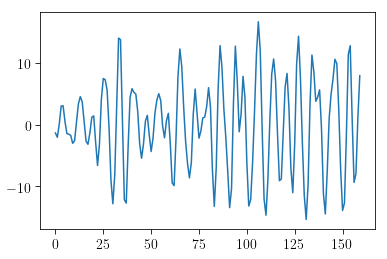

In [160]:
# plt.plot(avgWf.ch5Wf[3])
plt.plot(avgWfSoft.ch5Wf[12])
# plt.plot(avgWf.ch5Wf[3]-softWf.ch5Wf[12])

In [161]:
def calculatePower(t, v):
    dT = t[1]-t[0]
    power = np.sum(v**2)*dT
    return power